##  第6章 GANによる異常検知の準備ファイル

- 本ファイルでは、第6章で使用するフォルダの作成とファイルのダウンロードを行います。

In [1]:
import os
import urllib.request
import zipfile
import tarfile

import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
import numpy as np

In [2]:
# フォルダ「data」が存在しない場合は作成する
data_dir = "./data/"
if not os.path.exists(data_dir):
    os.mkdir(data_dir)

In [3]:
import sklearn
print(sklearn.__version__)

# AWSのAMIでsklernのversionが0.20より低い場合はバージョンを更新します
# pip install -U scikit-learn

1.3.2


In [4]:
# MNISTの手書き数字画像をダウンロードし読み込みます
from sklearn.datasets import fetch_openml

# mnist = fetch_openml('mnist_784', version=1, data_home="./data/")  # data_homeは保存先を指定します
mnist = fetch_openml('mnist_784', version=1, data_home="./data/", as_frame=False)  
# Issue #153 2020年12月にリリースされたsklearn 0.24.0以降の仕様変更に合わせる場合



/home/watanabe/image_env/lib/python3.8/site-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [5]:
# データの取り出し
X = mnist.data
y = mnist.target


この画像データのラベルは5です


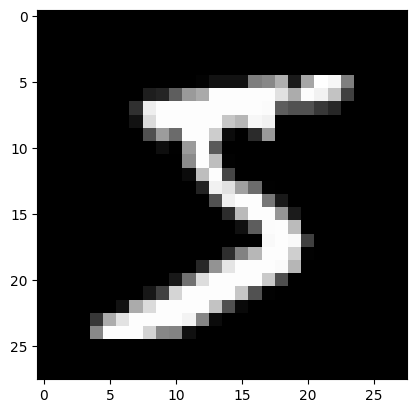

In [6]:
# MNISTのデータの1つ目を可視化する
plt.imshow(X[0].reshape(28, 28), cmap='gray')
print("この画像データのラベルは{}です".format(y[0]))

In [7]:
# フォルダ「data」の下にフォルダ「img_78」を作成する
data_dir_path = "./data/img_78/"
if not os.path.exists(data_dir_path):
    os.mkdir(data_dir_path)

In [8]:
# MNISTから数字7、8の画像だけフォルダ「img_78」に画像として保存していく
count7=0
count8=0
max_num=200  # 画像は200枚ずつ作成する

for i in range(len(X)):
    
    # 画像7の作成
    if (y[i] is "7") and (count7<max_num):
        file_path="./data/img_78/img_7_"+str(count7)+".jpg"
        im_f=(X[i].reshape(28, 28))  # 画像を28×28の形に変形
        pil_img_f = Image.fromarray(im_f.astype(np.uint8))  # 画像をPILに
        pil_img_f = pil_img_f.resize((64, 64), Image.BICUBIC)  # 64×64に拡大
        pil_img_f.save(file_path)  # 保存
        count7+=1 
    
    # 画像8の作成
    if (y[i] is "8") and (count8<max_num):
        file_path="./data/img_78/img_8_"+str(count8)+".jpg"
        im_f=(X[i].reshape(28, 28))  # 画像を28*28の形に変形
        pil_img_f = Image.fromarray(im_f.astype(np.uint8))  # 画像をPILに
        pil_img_f = pil_img_f.resize((64, 64), Image.BICUBIC)  # 64×64に拡大
        pil_img_f.save(file_path)  # 保存
        count8+=1
        
    # 7と8を200枚ずつ作成したらbreak
    if (count7>=max_num) and (count8>=max_num):
        break



<>:9: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:18: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:9: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:18: SyntaxWarning: "is" with a literal. Did you mean "=="?
/tmp/ipykernel_1107146/594444050.py:9: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if (y[i] is "7") and (count7<max_num):
/tmp/ipykernel_1107146/594444050.py:18: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if (y[i] is "8") and (count8<max_num):


In [9]:
# フォルダ「data」の下にフォルダ「test」を作成する
data_dir_path = "./data/test/"
if not os.path.exists(data_dir_path):
    os.mkdir(data_dir_path)


In [10]:
# 上記で7,8の画像を作成するのに使用したindexの最終値
i_start = i+1
print(i_start)

2244


In [11]:
# MNISTから数字7、8の画像だけフォルダ「img_78」に画像として保存していく
count2=0
count7=0
count8=0
max_num=5  # 画像は5枚ずつ作成する

for i in range(i_start,len(X)):  # i_startから始める
    
    # 画像2の作成
    if (y[i] is "2") and (count2<max_num):
        file_path="./data/test/img_2_"+str(count2)+".jpg"
        im_f=(X[i].reshape(28, 28))  # 画像を28×28の形に変形
        pil_img_f = Image.fromarray(im_f.astype(np.uint8))  # 画像をPILに
        pil_img_f = pil_img_f.resize((64, 64), Image.BICUBIC)  # 64×64に拡大
        pil_img_f.save(file_path)  # 保存
        count2+=1
    
    # 画像7の作成
    if (y[i] is "7") and (count7<max_num):
        file_path="./data/test/img_7_"+str(count7)+".jpg"
        im_f=(X[i].reshape(28, 28))  # 画像を28×28の形に変形
        pil_img_f = Image.fromarray(im_f.astype(np.uint8))  # 画像をPILに
        pil_img_f = pil_img_f.resize((64, 64), Image.BICUBIC)  # 64×64に拡大
        pil_img_f.save(file_path)  # 保存
        count7+=1 
    
    # 画像8の作成
    if (y[i] is "8") and (count8<max_num):
        file_path="./data/test/img_8_"+str(count8)+".jpg"
        im_f=(X[i].reshape(28, 28))  # 画像を28*28の形に変形
        pil_img_f = Image.fromarray(im_f.astype(np.uint8))  # 画像をPILに
        pil_img_f = pil_img_f.resize((64, 64), Image.BICUBIC)  # 64×64に拡大
        pil_img_f.save(file_path)  # 保存
        count8+=1 



<>:10: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:19: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:28: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:10: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:19: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:28: SyntaxWarning: "is" with a literal. Did you mean "=="?
/tmp/ipykernel_1107146/455322105.py:10: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if (y[i] is "2") and (count2<max_num):
/tmp/ipykernel_1107146/455322105.py:19: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if (y[i] is "7") and (count7<max_num):
/tmp/ipykernel_1107146/455322105.py:28: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if (y[i] is "8") and (count8<max_num):


In [16]:
# フォルダ「data」の下にフォルダ「img_78_28size」を作成する
data_dir_path = "./data/img_78_28size/"
if not os.path.exists(data_dir_path):
    os.mkdir(data_dir_path)

In [13]:
# MNISTから数字7、8の画像だけフォルダ「img_78_28size」に画像として保存していく
count7=0
count8=0
max_num=200  # 画像は200枚ずつ作成する

for i in range(len(X)):
    
    # 画像7の作成
    if (y[i] is "7") and (count7<max_num):
        file_path="./data/img_78_28size/img_7_"+str(count7)+".jpg"
        im_f=(X[i].reshape(28, 28))  # 画像を28×28の形に変形
        pil_img_f = Image.fromarray(im_f.astype(np.uint8))  # 画像をPILに
        pil_img_f.save(file_path)  # 保存
        count7+=1 
    
    # 画像8の作成
    if (y[i] is "8") and (count8<max_num):
        file_path="./data/img_78_28size/img_8_"+str(count8)+".jpg"
        im_f=(X[i].reshape(28, 28))  # 画像を28*28の形に変形
        pil_img_f = Image.fromarray(im_f.astype(np.uint8))  # 画像をPILに
        pil_img_f.save(file_path)  # 保存
        count8+=1
    
    if (count7>=max_num) and (count8>=max_num):
        break



<>:9: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:17: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:9: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:17: SyntaxWarning: "is" with a literal. Did you mean "=="?
/tmp/ipykernel_1107146/3823587466.py:9: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if (y[i] is "7") and (count7<max_num):
/tmp/ipykernel_1107146/3823587466.py:17: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if (y[i] is "8") and (count8<max_num):


In [17]:
# フォルダ「data」の下にフォルダ「test」を作成する
data_dir_path = "./data/test_28size/"
if not os.path.exists(data_dir_path):
    os.mkdir(data_dir_path)

# 上記で7,8の画像を作成するのに使用したindexの最終値
i_start = i+1
print(i_start)

2245


In [18]:
# MNISTから数字7、8の画像だけフォルダ「img_78」に画像として保存していく
count2=0
count7=0
count8=0
max_num=5  # 画像は5枚ずつ作成する

for i in range(i_start,len(X)):  # i_startから始める
    
    # 画像2の作成
    if (y[i] is "2") and (count2<max_num):
        file_path="./data/test_28size/img_2_"+str(count2)+".jpg"
        im_f=(X[i].reshape(28, 28))  # 画像を28×28の形に変形
        pil_img_f = Image.fromarray(im_f.astype(np.uint8))  # 画像をPILに
        pil_img_f.save(file_path)  # 保存
        count2+=1 
    
    # 画像7の作成
    if (y[i] is "7") and (count7<max_num):
        file_path="./data/test_28size/img_7_"+str(count7)+".jpg"
        im_f=(X[i].reshape(28, 28))  # 画像を28×28の形に変形
        pil_img_f = Image.fromarray(im_f.astype(np.uint8))  # 画像をPILに
        pil_img_f.save(file_path)  # 保存
        count7+=1 
    
    # 画像8の作成
    if (y[i] is "8") and (count8<max_num):
        file_path="./data/test_28size/img_8_"+str(count8)+".jpg"
        im_f=(X[i].reshape(28, 28))  # 画像を28*28の形に変形
        pil_img_f = Image.fromarray(im_f.astype(np.uint8))  # 画像をPILに
        pil_img_f.save(file_path)  # 保存
        count8+=1 



<>:10: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:18: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:26: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:10: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:18: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:26: SyntaxWarning: "is" with a literal. Did you mean "=="?
/tmp/ipykernel_1107146/4089262684.py:10: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if (y[i] is "2") and (count2<max_num):
/tmp/ipykernel_1107146/4089262684.py:18: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if (y[i] is "7") and (count7<max_num):
/tmp/ipykernel_1107146/4089262684.py:26: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if (y[i] is "8") and (count8<max_num):


以上